In [5]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.vec_env import DummyVecEnv

In [6]:
# Create CartPole environment
env = gym.make('CartPole-v1')
check_env(env)

In [12]:
ppo_model = PPO(
    "MlpPolicy",
    env,
    verbose=1,
    tensorboard_log="./ppo_binpacking_tensorboard",
    learning_rate=1e-4,
    n_steps=2048,
    batch_size=64,
    n_epochs=10
)

# Define number of training timesteps
num_timesteps = 250000

# Train the agent
ppo_model.learn(total_timesteps=num_timesteps)

# Save the model
ppo_model.save("ppo_cartpole")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./ppo_binpacking_tensorboard\PPO_5
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.2     |
|    ep_rew_mean     | 21.2     |
| time/              |          |
|    fps             | 924      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 25.5         |
|    ep_rew_mean          | 25.5         |
| time/                   |              |
|    fps                  | 565          |
|    iterations           | 2            |
|    time_elapsed         | 7            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0078410115 |
|    clip_fraction        | 0.0713       |
|   

In [ ]:
env = gym.make('CartPole-v1', render_mode = 'human')
model = PPO.load("ppo_cartpole")

# Evaluate the agent
num_episodes = 100
rewards = []

for episode in range(num_episodes):
    obs,_ = env.reset()
    done = False
    total_reward = 0

    while not done:
        action, _ = model.predict(obs)
        obs, reward, _, done, info = env.step(action)
        total_reward += reward
        env.render()

    rewards.append(total_reward)
    print(f'Episode: {episode}, Total Reward: {total_reward}')

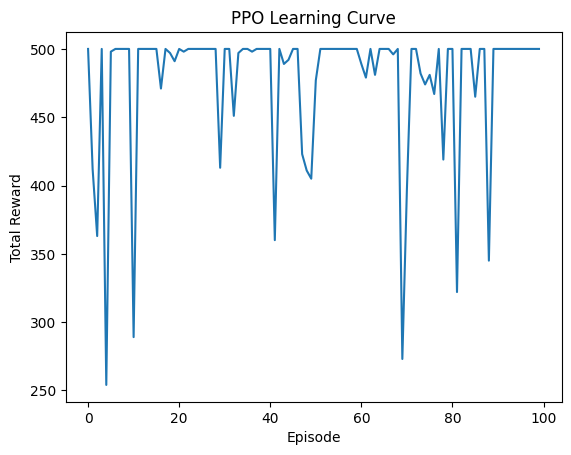

In [48]:
plt.plot(rewards)
plt.title('PPO Learning Curve')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()